In [5]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

In [6]:
tables_finishes_file = 'table_finishes_lm.pkl'
#tables_finishes_file = 'table_finishes_bayes.pkl'

In [7]:
with open(tables_finishes_file, 'rb') as file:
    loaded_data = pickle.load(file)

teams = pd.read_csv('../data/teams.csv')
# Transform
df_meta = pd.DataFrame(loaded_data)
df_long = pd.melt(df_meta, var_name='Team', value_name='Position')
df_long = df_long.sort_values('Team')
df_long = df_long.merge(teams, left_on='Team', right_on='TeamID')

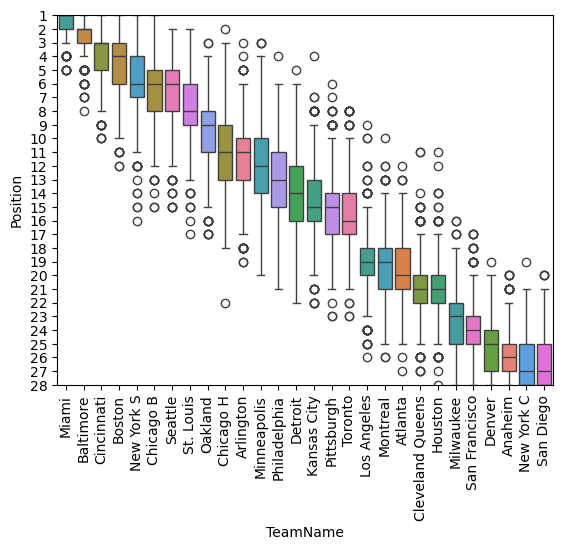

In [8]:
y_min = df_long['Position'].min()
y_max = df_long['Position'].max()

means = df_long.groupby('TeamName')['Position'].mean()
ordered_categories = means.sort_values(ascending=True).index
plt.ylim(y_min, y_max)
plt.yticks(range(1, 29))
# Plotting boxplot ordered by mean values
sns.boxplot(data=df_long, x="TeamName", y="Position", hue='TeamName', order=ordered_categories)
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.gca().invert_yaxis()
plt.show()

In [9]:
fig = px.box(df_long, x="TeamName", y="Position", color='TeamName',
             category_orders={'TeamName': ordered_categories})
fig.update_yaxes(
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18,
              19, 20, 21, 22, 23, 24, 25, 26,
              27, 28],  # Specify y-axis tick values
    autorange='reversed'  # Invert the y-axis
)
fig.update_layout(
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)
fig.update_layout(
    title_text='MLS Season 2 Table Predictions: 1000 Samples',  # Add a title
    yaxis_title=None,
    xaxis_title=None 
)

fig.show()

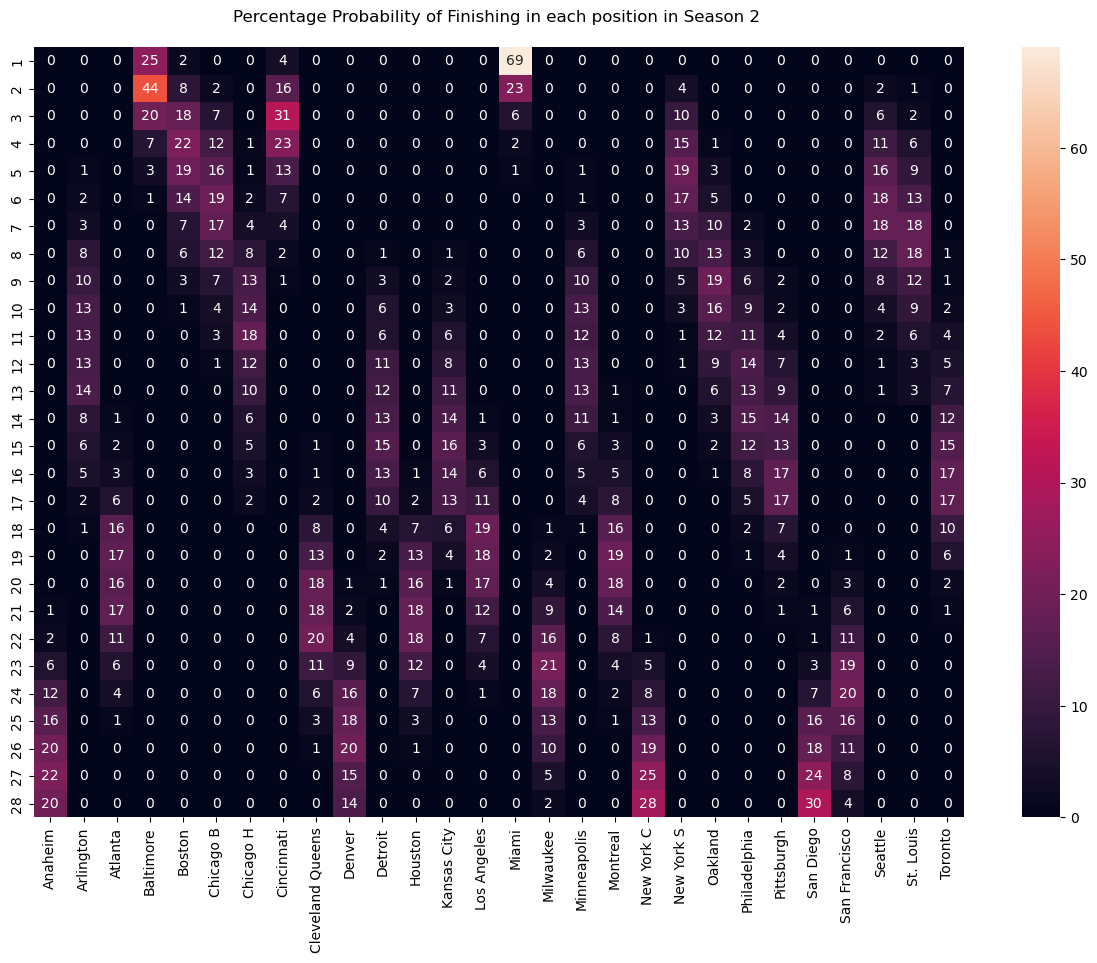

In [10]:
xx = df_long.drop('TeamID', axis=1)
xx = xx.groupby(['TeamName', 'Position'])['Team'].count().reset_index()
xx = xx.pivot(index='Position', columns='TeamName', values='Team').fillna(0) / 1000

xy = round(xx * 100).astype(int)

plt.figure(figsize=(15, 10))  # Width, Height in inches
plt.gca().invert_yaxis()
ax = sns.heatmap(xy, annot=True)
# Plotting boxplot ordered by mean values
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
ax.set(xlabel="", ylabel="")
ax.set(title='Percentage Probability of Finishing in each position in Season 2 \n')
plt.show()